Imports


In [159]:
import matplotlib.pyplot as plt
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"
# ML
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import precision_score , recall_score
from sklearn.metrics import classification_report

Loading data


In [160]:
# Load the MNIST dataset
# data already comes splitted into training and testing
# x is the input and y is the classification
mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocess the data from 0 - 255 to 0 - 1
x_train = x_train / 255.0
x_test = x_test / 255.0

Creating model


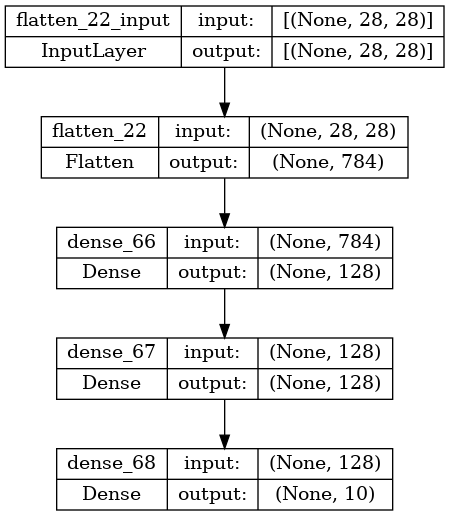

In [146]:

model = keras.Sequential([
    # Flattens the input (creates a flat layer)
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(num_classes, activation='softmax')
])

tf.keras.utils.plot_model(model, 'default.png', show_shapes=True)

Training the model

In [147]:
# We compile the model using
# The stochastic gradient descent optimization algorithm Adam
# Sparse categorical crossentropy as our loss function

# Compile model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# Define the early stopping callback
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)

# Train the model with early stopping and validation split of 20%
history = model.fit(x_train, y_train, epochs=1000, validation_split=0.2, callbacks=[early_stop])
model.save('default.model')

Epoch 1/1000
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2587 - accuracy: 0.9245 - val_loss: 0.1348 - val_accuracy: 0.9608
Epoch 2/1000
1500/1500 [==============================] - 4s 2ms/step - loss: 0.1080 - accuracy: 0.9670 - val_loss: 0.1235 - val_accuracy: 0.9616
Epoch 3/1000
1500/1500 [==============================] - 4s 2ms/step - loss: 0.0735 - accuracy: 0.9766 - val_loss: 0.0936 - val_accuracy: 0.9728
Epoch 4/1000
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0556 - accuracy: 0.9825 - val_loss: 0.0936 - val_accuracy: 0.9728
Epoch 5/1000
1500/1500 [==============================] - 4s 2ms/step - loss: 0.0421 - accuracy: 0.9862 - val_loss: 0.0939 - val_accuracy: 0.9733
Epoch 6/1000
1500/1500 [==============================] - 4s 2ms/step - loss: 0.0335 - accuracy: 0.9888 - val_loss: 0.0860 - val_accuracy: 0.9756
Epoch 7/1000
1500/1500 [==============================] - 4s 2ms/step - loss: 0.0301 - accuracy: 0.9899 - val_loss: 0.0998 -

INFO:tensorflow:Assets written to: default.model/assets


INFO:tensorflow:Assets written to: default.model/assets


Evaluate model

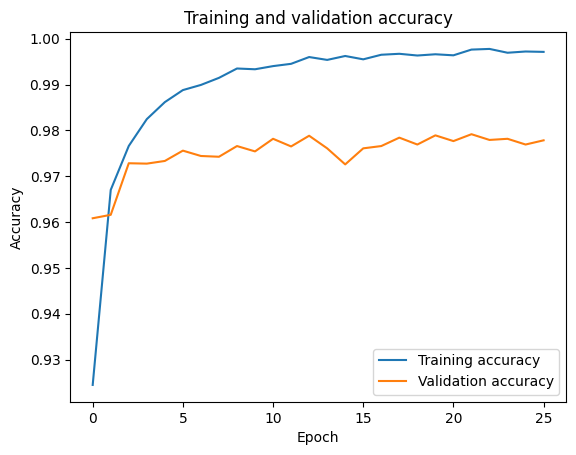

In [148]:
# Plot the accuracy during training
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [149]:
# Make predictions on the test data
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Compute precision and recall for each class
print(classification_report(y_test, y_pred_classes,digits=4))

313/313 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0     0.9809    0.9949    0.9878       980
           1     0.9921    0.9930    0.9925      1135
           2     0.9930    0.9680    0.9804      1032
           3     0.9505    0.9891    0.9694      1010
           4     0.9855    0.9705    0.9779       982
           5     0.9786    0.9731    0.9758       892
           6     0.9925    0.9697    0.9810       958
           7     0.9610    0.9825    0.9716      1028
           8     0.9673    0.9733    0.9703       974
           9     0.9798    0.9633    0.9715      1009

    accuracy                         0.9780     10000
   macro avg     0.9781    0.9777    0.9778     10000
weighted avg     0.9782    0.9780    0.9780     10000



Changing activation function

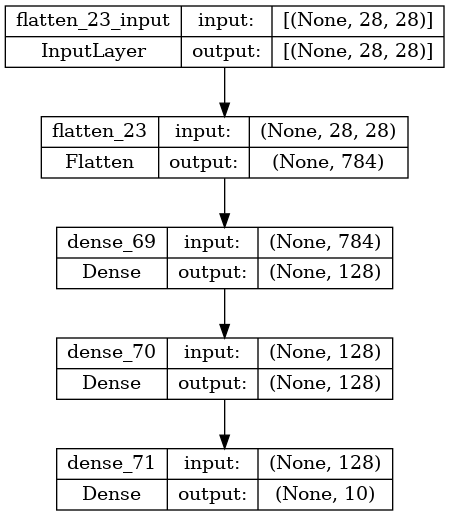

In [150]:
model = keras.Sequential([
    # Flattens the input (creates a flat layer)
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='sigmoid'),
    keras.layers.Dense(128, activation='sigmoid'),
    keras.layers.Dense(num_classes, activation='softmax')
])

tf.keras.utils.plot_model(model, 'sigmoid.png', show_shapes=True)

In [151]:

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Define the early stopping callback
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)

# Train the model with early stopping and validation split of 20%
history = model.fit(x_train, y_train, epochs=1000, validation_split=0.2, callbacks=[early_stop])
model.save('sigmoid.model')

Epoch 1/1000
1500/1500 [==============================] - 4s 2ms/step - loss: 0.4727 - accuracy: 0.8734 - val_loss: 0.2212 - val_accuracy: 0.9348
Epoch 2/1000
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1916 - accuracy: 0.9431 - val_loss: 0.1706 - val_accuracy: 0.9497
Epoch 3/1000
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1362 - accuracy: 0.9589 - val_loss: 0.1275 - val_accuracy: 0.9617
Epoch 4/1000
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1010 - accuracy: 0.9702 - val_loss: 0.1093 - val_accuracy: 0.9661
Epoch 5/1000
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0775 - accuracy: 0.9770 - val_loss: 0.1020 - val_accuracy: 0.9690
Epoch 6/1000
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0623 - accuracy: 0.9811 - val_loss: 0.0878 - val_accuracy: 0.9733
Epoch 7/1000
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0491 - accuracy: 0.9855 - val_loss: 0.0943 -

INFO:tensorflow:Assets written to: sigmoid.model/assets


INFO:tensorflow:Assets written to: sigmoid.model/assets


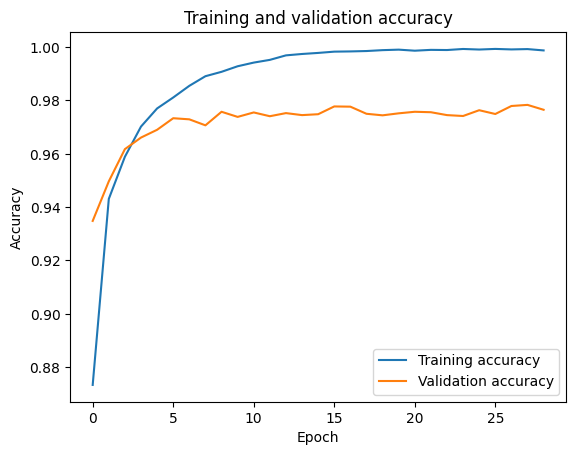

313/313 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0     0.9808    0.9929    0.9868       980
           1     0.9921    0.9903    0.9912      1135
           2     0.9665    0.9787    0.9726      1032
           3     0.9657    0.9762    0.9710      1010
           4     0.9816    0.9766    0.9791       982
           5     0.9885    0.9608    0.9744       892
           6     0.9874    0.9812    0.9843       958
           7     0.9758    0.9786    0.9772      1028
           8     0.9646    0.9784    0.9715       974
           9     0.9789    0.9643    0.9715      1009

    accuracy                         0.9781     10000
   macro avg     0.9782    0.9778    0.9779     10000
weighted avg     0.9782    0.9781    0.9781     10000



In [152]:
# Plot the accuracy during training
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
# Make predictions on the test data
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Compute precision and recall for each class
print(classification_report(y_test, y_pred_classes,digits=4))


Decreasing neuron count

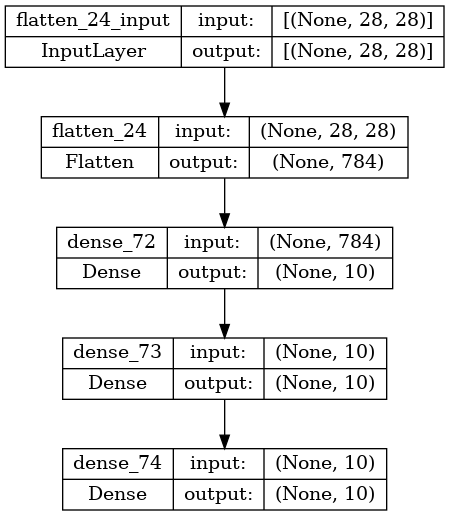

In [153]:
model = keras.Sequential([
    # Flattens the input (creates a flat layer)
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(num_classes, activation='softmax')
])

tf.keras.utils.plot_model(model, 'neuron.png', show_shapes=True)

In [154]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Define the early stopping callback
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)

# Train the model with early stopping and validation split of 20%
history = model.fit(x_train, y_train, epochs=1000, validation_split=0.2, callbacks=[early_stop])
model.save('neuron.model')

Epoch 1/1000
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5912 - accuracy: 0.8316 - val_loss: 0.2982 - val_accuracy: 0.9152
Epoch 2/1000
1500/1500 [==============================] - 2s 2ms/step - loss: 0.2955 - accuracy: 0.9160 - val_loss: 0.2690 - val_accuracy: 0.9221
Epoch 3/1000
1500/1500 [==============================] - 2s 2ms/step - loss: 0.2654 - accuracy: 0.9231 - val_loss: 0.2422 - val_accuracy: 0.9293
Epoch 4/1000
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2472 - accuracy: 0.9284 - val_loss: 0.2349 - val_accuracy: 0.9317
Epoch 5/1000
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2323 - accuracy: 0.9315 - val_loss: 0.2349 - val_accuracy: 0.9311
Epoch 6/1000
1500/1500 [==============================] - 2s 2ms/step - loss: 0.2217 - accuracy: 0.9352 - val_loss: 0.2283 - val_accuracy: 0.9326
Epoch 7/1000
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2131 - accuracy: 0.9376 - val_loss: 0.2260 -

INFO:tensorflow:Assets written to: neuron.model/assets


INFO:tensorflow:Assets written to: neuron.model/assets


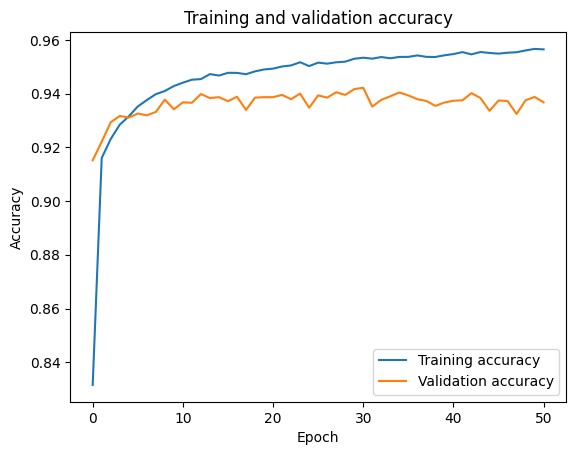

313/313 [==============================] - 0s 781us/step
              precision    recall  f1-score   support

           0     0.9587    0.9704    0.9645       980
           1     0.9807    0.9859    0.9833      1135
           2     0.9407    0.9370    0.9388      1032
           3     0.8880    0.9188    0.9032      1010
           4     0.9213    0.9532    0.9369       982
           5     0.8840    0.9395    0.9109       892
           6     0.9536    0.9645    0.9590       958
           7     0.9586    0.9241    0.9411      1028
           8     0.9390    0.8850    0.9112       974
           9     0.9506    0.8969    0.9230      1009

    accuracy                         0.9380     10000
   macro avg     0.9375    0.9375    0.9372     10000
weighted avg     0.9386    0.9380    0.9380     10000



In [155]:
# Plot the accuracy during training
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
# Make predictions on the test data
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Compute precision and recall for each class
print(classification_report(y_test, y_pred_classes,digits=4))


Changing optimizer

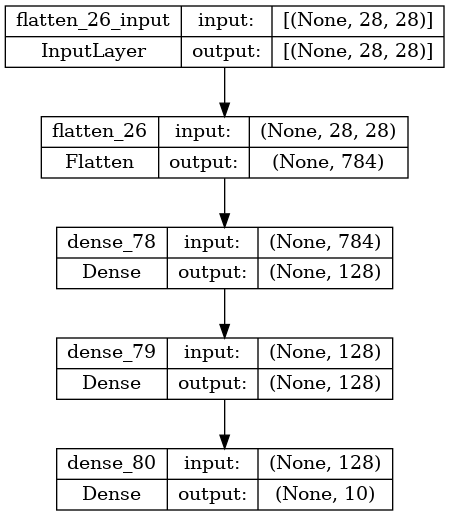

In [161]:
model = keras.Sequential([
    # Flattens the input (creates a flat layer)
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(num_classes, activation='softmax')
])

tf.keras.utils.plot_model(model, 'sgd.png', show_shapes=True)

In [162]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
# Define the early stopping callback
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)

# Train the model with early stopping and validation split of 20%
history = model.fit(x_train, y_train, epochs=1000, validation_split=0.2, callbacks=[early_stop])
model.save('sgd.model')

Epoch 1/1000
1500/1500 [==============================] - 4s 3ms/step - loss: 0.7435 - accuracy: 0.8077 - val_loss: 0.3440 - val_accuracy: 0.9033
Epoch 2/1000
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3258 - accuracy: 0.9068 - val_loss: 0.2755 - val_accuracy: 0.9193
Epoch 3/1000
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2690 - accuracy: 0.9221 - val_loss: 0.2429 - val_accuracy: 0.9287
Epoch 4/1000
1500/1500 [==============================] - 4s 2ms/step - loss: 0.2336 - accuracy: 0.9330 - val_loss: 0.2128 - val_accuracy: 0.9392
Epoch 5/1000
1500/1500 [==============================] - 4s 2ms/step - loss: 0.2061 - accuracy: 0.9407 - val_loss: 0.1934 - val_accuracy: 0.9447
Epoch 6/1000
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1850 - accuracy: 0.9465 - val_loss: 0.1772 - val_accuracy: 0.9507
Epoch 7/1000
1500/1500 [==============================] - 4s 2ms/step - loss: 0.1671 - accuracy: 0.9525 - val_loss: 0.1647 -

INFO:tensorflow:Assets written to: sgd.model/assets


INFO:tensorflow:Assets written to: sgd.model/assets


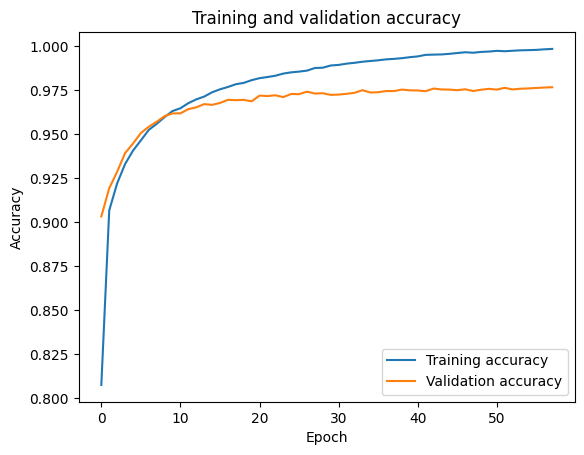

313/313 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0     0.9758    0.9888    0.9823       980
           1     0.9920    0.9894    0.9907      1135
           2     0.9712    0.9787    0.9749      1032
           3     0.9742    0.9723    0.9732      1010
           4     0.9775    0.9735    0.9755       982
           5     0.9797    0.9742    0.9770       892
           6     0.9802    0.9802    0.9802       958
           7     0.9720    0.9796    0.9758      1028
           8     0.9669    0.9589    0.9629       974
           9     0.9760    0.9693    0.9727      1009

    accuracy                         0.9767     10000
   macro avg     0.9766    0.9765    0.9765     10000
weighted avg     0.9767    0.9767    0.9767     10000



In [163]:
# Plot the accuracy during training
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
# Make predictions on the test data
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Compute precision and recall for each class
print(classification_report(y_test, y_pred_classes,digits=4))
